### DAT158: ML-assignment-2-Project-work

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


In [34]:
test.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes


In [35]:
train.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [36]:
train = train.drop(columns=["id"])
test = test.drop(columns=["id"])

In [37]:
train.isnull().sum()

brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [38]:
test.isnull().sum()

brand               0
model               0
model_year          0
milage              0
fuel_type        3383
engine              0
transmission        0
ext_col             0
int_col             0
accident         1632
clean_title     14239
dtype: int64

In [39]:
train.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [40]:
test.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title'],
      dtype='object')

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         188533 non-null  object
 1   model         188533 non-null  object
 2   model_year    188533 non-null  int64 
 3   milage        188533 non-null  int64 
 4   fuel_type     183450 non-null  object
 5   engine        188533 non-null  object
 6   transmission  188533 non-null  object
 7   ext_col       188533 non-null  object
 8   int_col       188533 non-null  object
 9   accident      186081 non-null  object
 10  clean_title   167114 non-null  object
 11  price         188533 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 17.3+ MB


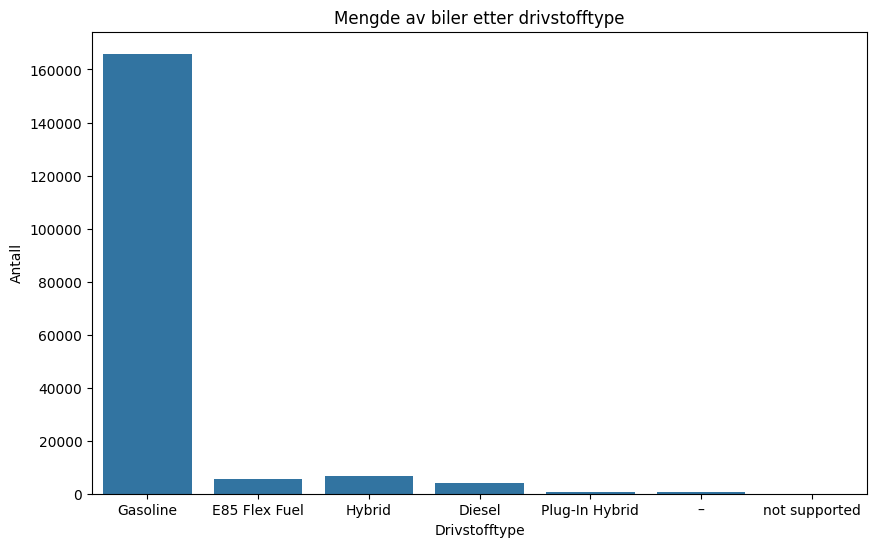

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(x='fuel_type', data=train)
plt.title('Mengde av biler etter drivstofftype')
plt.xlabel('Drivstofftype')
plt.ylabel('Antall')
plt.show()

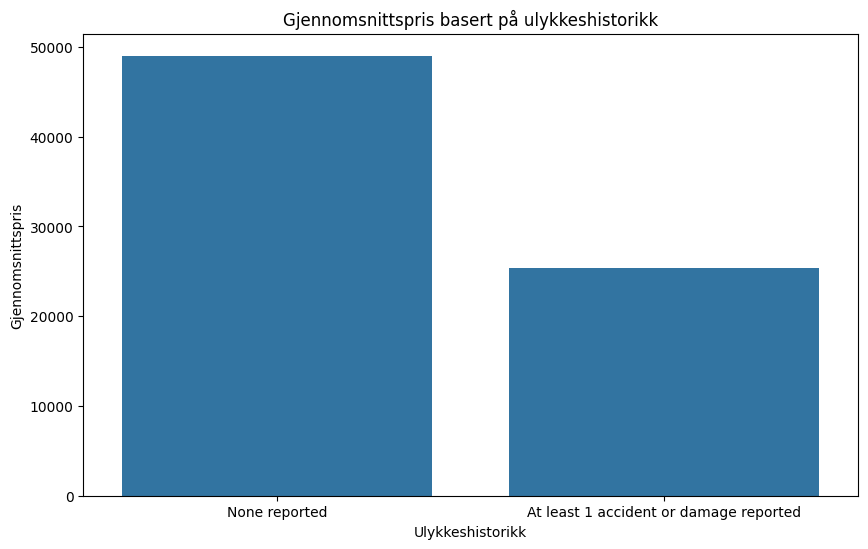

In [43]:
plt.figure(figsize=(10, 6))
sns.barplot(x='accident', y='price', data=train, errorbar=None)
plt.title('Gjennomsnittspris basert på ulykkeshistorikk')
plt.xlabel('Ulykkeshistorikk')
plt.ylabel('Gjennomsnittspris')
plt.show()

In [44]:
missing_train = train.isna().mean() * 100
missing_test = test.isna().mean() * 100

print("Kolonner med mer enn 10% manglende verdier i train:")
print(missing_train[missing_train > 0])

print("\nKolonner med mer enn 10% manglende verdier i test:")
print(missing_test[missing_test > 0])

Kolonner med mer enn 10% manglende verdier i train:
fuel_type       2.696080
accident        1.300568
clean_title    11.360876
dtype: float64

Kolonner med mer enn 10% manglende verdier i test:
fuel_type       2.691543
accident        1.298433
clean_title    11.328666
dtype: float64


In [45]:
X = train.drop(columns=["price"])
y = train["price"]

X_tr, X_va, y_tr, y_va = train_test_split(
    X, y, test_size=0.2, random_state=42
)

num_cols = [c for c in X_tr.columns if pd.api.types.is_numeric_dtype(X_tr[c])]
cat_cols = [c for c in X_tr.columns if c not in num_cols]

print(f"\nCategorical columns: {cat_cols}")
print(f"Numerical columns: {num_cols}")


Categorical columns: ['brand', 'model', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']
Numerical columns: ['model_year', 'milage']


In [46]:
numeric = Pipeline([("imputer", SimpleImputer(strategy="median"))])
categorical = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer([
    ("num", numeric, num_cols),
    ("cat", categorical, cat_cols),
])

In [47]:
rf = RandomForestRegressor(
    n_estimators=500, 
    max_depth=None, 
    min_samples_split=2, 
    min_samples_leaf=1, 
    max_features='sqrt',
    n_jobs=-1, 
    oob_score=True,
    random_state=42
    )

pipe = Pipeline([("prep", preprocess), ("rf", rf)])

pipe.fit(X_tr, y_tr)

,steps,"[('prep', ...), ('rf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [48]:
# Predict on the validation set (X_va) to match y_va
oob_score = rf.oob_score_

pred_valid = pipe.predict(X_va)

rmse = mean_squared_error(y_va, pred_valid)
mae = mean_absolute_error(y_va, pred_valid)
r2 = r2_score(y_va, pred_valid)

print(f'Out-of-Bag Score: {oob_score}')
print(f"RMSE: ${rmse:,.2f}")
print(f"MAE: ${mae:,.2f}")
print(f"R² Score: {r2:.4f}")

Out-of-Bag Score: 0.05278515972360054
RMSE: $5,253,924,301.98
MAE: $20,528.19
R² Score: 0.0552


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error
import numpy as np

# 1) Split
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2) Fit ONLY on the training split
pipe.fit(X_train, y_train)

# 3) Predict on the validation split
pred_valid = pipe.predict(X_valid)

# 4) Metrics (same length on both sides)
y_v = y_valid.to_numpy() if hasattr(y_valid, "to_numpy") else np.asarray(y_valid)
p_v = np.asarray(pred_valid)

rmse = root_mean_squared_error(y_v, p_v)
mae  = mean_absolute_error(y_v, p_v)
r2   = r2_score(y_v, p_v)
print(f"Holdout RMSE={rmse:,.2f}  MAE={mae:,.2f}  R²={r2:.4f}")


Holdout RMSE=72,483.96  MAE=20,528.19  R²=0.0552


In [49]:
pipe.fit(X, y)
test_pred = pipe.predict(test)


In [51]:
pred_valid = pipe.predict(X)

rmse = mean_squared_error(y, pred_valid)
mae  = mean_absolute_error(y, pred_valid)
r2   = r2_score(y, pred_valid)
print(f'Out-of-Bag Score: {oob_score}')
print(f"RMSE: ${rmse:,.2f}")
print(f"MAE: ${mae:,.2f}")
print(f"R² Score: {r2:.4f}")


Out-of-Bag Score: 0.05278515972360054
RMSE: $805,933,908.78
MAE: $7,539.96
R² Score: 0.8703


AssertionError: 